In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from matplotlib import cm
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

#import warnings
#warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [44]:
def toMap( crystalsInCluster ):
    xtalMapEast = []
    for i in range(54):
        if(i in crystalsInCluster):
            xtalMapEast.append(1)
        else:
            xtalMapEast.append(0)

    xtalMapEast.reverse()
    list1 = []
    list2 = []
    xtal = []
    list2xtal = []
    for crystal in range(54):
        list2.append(xtalMapEast[crystal]) 
        list2xtal.append(crystal)
        if (crystal+1) % 9 == 0: #split into 9 column blocks
            list1.append(list2)
            list2 = []
            list2xtal.reverse()
            xtal.append(list2xtal)
            list2xtal = []
    xtal.reverse()
    
    return( list1 )

def arrangeXtals( vec1 ):
    vec1.reverse()
    list1 = []
    list2 = []
    for crystal in range(54):
        list2.append(vec1[crystal]) 
        if (crystal+1) % 9 == 0: #split into 9 column blocks
            list1.append(list2)
            list2 = []
            list2xtal = []
    return(list1)

def imshowCompare( vec1, vec2, showPlot = True ):
    vec3 = []
    for i in range(len(vec1)):
        vec3i = []
        for j in range(len(vec1[0])):
            if(vec1[i][j] > 0.1 and vec2[i][j] > 0.1):
                vec3i.append(2) #both recons include this xtal
            elif (vec1[i][j] > 0.1):
                vec3i.append(1) #only recon east includes this crystal
            elif (vec2[i][j] > 0.1):
                vec3i.append(3) #only recon west
            else:
                vec3i.append(5) #not inluded in either recon's cluster.
        vec3.append(vec3i)
        
    fig, ax = plt.subplots()

    cmap = matplotlib.colors.ListedColormap(['blue', 'xkcd:teal green', 'xkcd:forest green', 'xkcd:light grey'])
    cmap.set_over('xkcd:light grey')
    cmap.set_under('xkcd:light grey')
    
    bounds = [1, 2, 3, 4]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    cax = ax.imshow(vec3, interpolation='nearest', cmap=cmap, vmin=1,vmax=5)
    ax.set_title('Crystals Identified as Part of Cluster')
    cbar = fig.colorbar(cax,
                        cmap=cmap,
                        boundaries = [0] + bounds + [5],
                        extend='both',
                        extendfrac='auto',
                        spacing='uniform',
                        ticks=[x + 0.5 for x in bounds],
                        orientation='vertical')
    cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    cbar.ax.set_yticklabels(['East Only', 'Both', 'West Only'])
          
    if(showPlot):
        plt.show()
    else:
        plt.close()
    
    return(vec3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
[[53, 52, 51, 50, 49, 48, 47, 46, 45], [44, 43, 42, 41, 40, 39, 38, 37, 36], [35, 34, 33, 32, 31, 30, 29, 28, 27], [26, 25, 24, 23, 22, 21, 20, 19, 18], [17, 16, 15, 14, 13, 12, 11, 10, 9], [8, 7, 6, 5, 4, 3, 2, 1, 0]]


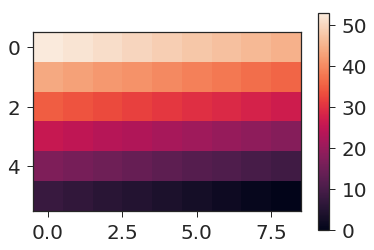

In [45]:
ding =  [i for i in range(54)]
print(ding)
dong = arrangeXtals(ding)
print(dong)
plt.imshow(dong)
plt.colorbar()
plt.show()

In [46]:
crystalsEast = [1,2,3,10,11,12,31]
crystalsWest = [31,52,45]
xtalMapEast = toMap(crystalsEast)
xtalMapWest = toMap(crystalsWest)

In [47]:
print(xtalMapEast)
print(xtalMapWest)

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0]]
[[0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


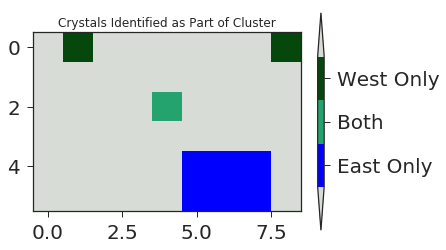

[[5, 3, 5, 5, 5, 5, 5, 5, 3], [5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 2, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 1, 1, 1, 5], [5, 5, 5, 5, 5, 1, 1, 1, 5]]


In [48]:
ding = imshowCompare(xtalMapEast,xtalMapWest, True)
print(ding)

In [27]:
f = r.TFile("./data/gm2offline_ana.root")

In [28]:
t = f.Get("farline").Get("evwTree")
t.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :    50883 : Total =        13271452 bytes  File  Size =    5654647 *
*        :          : Tree compression factor =   2.35                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    50883 : Total  Size=     204553 bytes  File Size  =       1787 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 114.19     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    50883 : Total  Size=     204586 bytes  File Size  =       1801 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 113.32     *
*...................................................

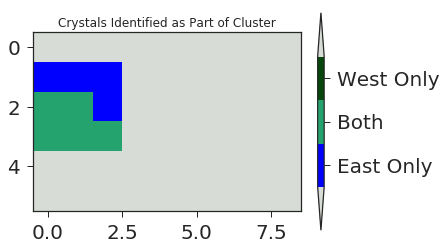

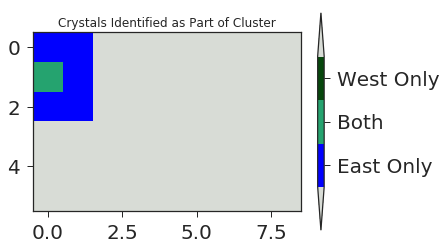

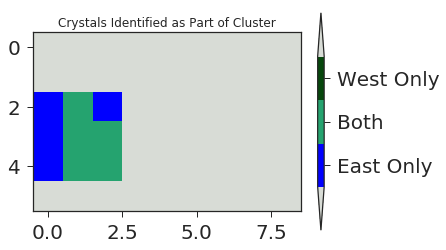

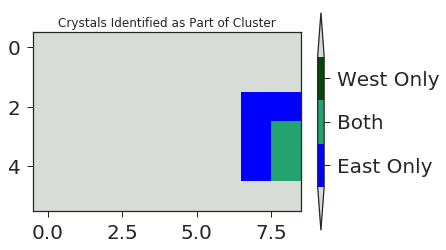

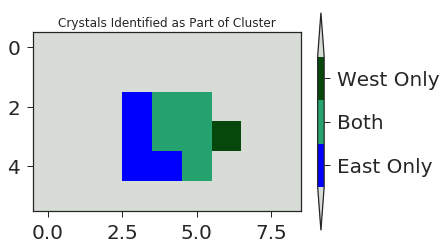

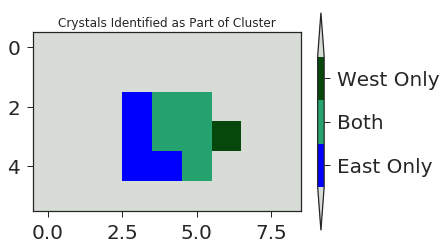

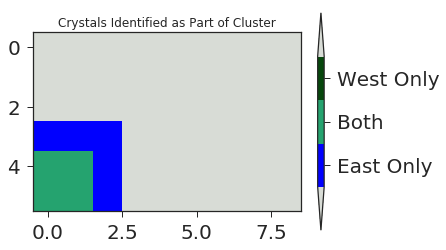

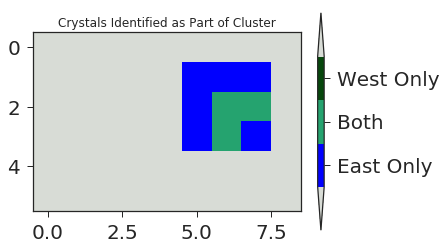

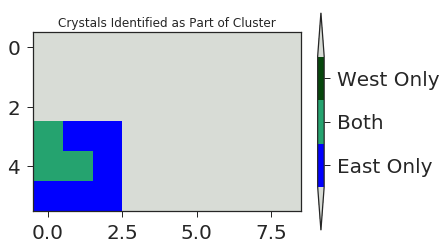

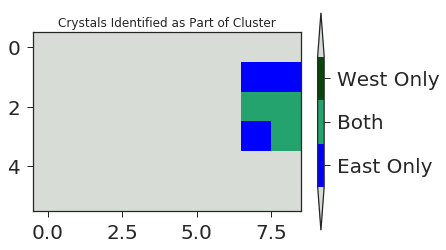

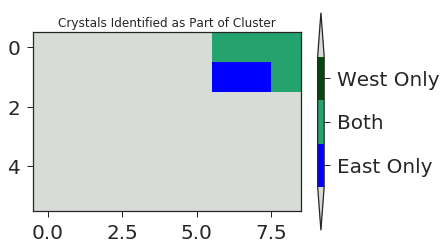

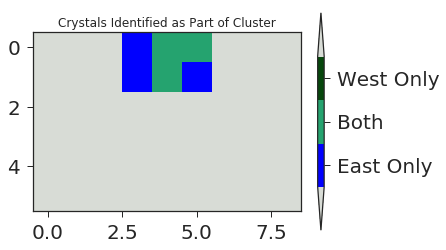

In [29]:
compVec = []
for i, entry in enumerate(t):
    if i > 10: 
        break
    xtalMapEast = toMap(entry.crystalsEast)
    xtalMapWest = toMap(entry.crystalsWest)
    
    compVeci = imshowCompare(xtalMapEast,xtalMapWest,True)
    for ding in compVeci:
        if(3 in ding):
            imshowCompare(xtalMapEast,xtalMapWest,True)
    compVec.append(compVeci)

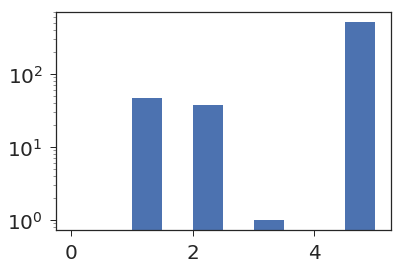

In [30]:
compUnrolled = [subitem for sublist in compVec for item in sublist for subitem in item]
plt.hist(compUnrolled,range=(0,5),bins=10,log=True)
plt.show()

We can also loop over all of the crystals and see if there are any 'hot spots' on the calorimeter, by incrementing for each east cluster and decrementing for each west cluster

In [42]:
clusterHeatMap = [0 for i in range(54)]
for entry in t:
    if i > 1000:
        break
    xtalMapEast = entry.crystalsEast
    for x in xtalMapEast:
        clusterHeatMap[int(x)] = clusterHeatMap[int(x)] + 1
    xtalMapWest = entry.crystalsWest
    for x in xtalMapWest:
        clusterHeatMap[int(x)] = clusterHeatMap[int(x)] - 1
clusterHeatMap = arrangeXtals(clusterHeatMap)
print(clusterHeatMap)

[[2622, 4108, 2957, 2854, 2497, 2212, 2158, 2431, 1316], [5081, 8182, 5667, 5020, 4381, 3936, 3569, 3965, 2173], [6724, 11619, 7730, 6840, 5993, 5147, 4593, 4908, 2545], [6752, 11304, 7375, 6467, 5822, 5155, 4551, 5081, 2845], [4672, 7306, 5104, 4619, 4096, 3904, 3556, 4007, 2020], [2214, 3352, 2652, 2495, 2342, 2437, 2150, 2457, 1257]]


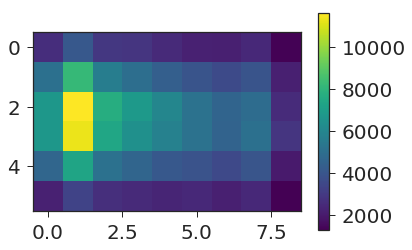

In [43]:
plt.imshow(clusterHeatMap,cmap=plt.cm.viridis)
plt.colorbar()
plt.show()